# 선형회귀 심화
  - 경사하강법의 종류
  - 과대적합과 정규화
  - 사이킷런을 이용한 선형회귀

  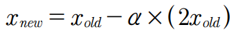

In [110]:
# y= x**2
# y' = 2x



확률적 경사하강법 SGD
  - 장점
    - 업데이트가 빈번하게 이루어지기때문에 성능변화를 빠르게 확인
    - 데이터의 특성에 따라서 훨신 더 빠르게 결과값을 냄
    - 지역 최적화를 회피
  - 단점
    - 대용량 데이터인경우에 시간이 오래걸린다
    - 흔히 튀는현상이 발생해서 마지막에 결과 값을 확인하기 어려움


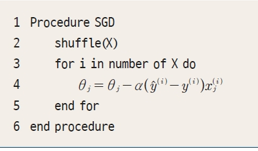

- 미니 배치 경사하강법
  - 데이터의 랜덤한 일부분만 입력해서 경사도 평균을 구함
- 에포크
    - 데이터를 한번에 학습시키는 횟수
      - ex : 전체데이터를 학습에 투입한다고 하면. 학습한번이 1 epoch
        - 미니배치의 배치크기가 20개씩이라면.(전체 100) 20개씩 학습을 5번해야 전체 데이터를 다 학습하고 이것이 1 epoch
        


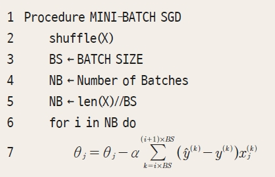

In [111]:
import numpy as np

class LinearRegressionGD(object):
  def __init__(self, fit_intercept=True,copy_X=True, eta0=0.001, epochs=1000, batch_size=1, weight_decay=0.9,shuffle=True):
    self.fit_intercept = fit_intercept
    self.copy_X = copy_X
    self._eta0 = eta0         # 학습률(learning rate)
    self._epochs = epochs     # 전체 데이터에 대한 반복 횟수
    self._batch_size = batch_size  # 배치 크기
    self._weight_decay = weight_decay  # 가중치 감소 매 반복할때마가 학습률을 이 값으로 감소시킨다
    self._cost_history=[]
    self._coef = None
    self._intercept = None
    self._w_history = None
    self._new_X = None
    self._is_SGD = shuffle

  # 기울기 계산
  def gradient(self, X, y, theta):  # theta는 가중치
    return X.T.dot(self.hypothesis_function(X, theta) - y) / len(x)

  # 모델 학습
  def fit(self, X, y):
    self._new_X = np.array(X)  # 데이터 할당
    y = y.reshape(-1, 1)
    if self.fit_intercept:
      pass
    # 가중치 초기화
    theta_init = np.random.normal(0,1, self._new_X.shape[1])
    self._w_history = [theta_init]
    self._cost_history = [
        self.cost(self.hypothesis_function(self._new_X, theta_init), y)
    ]





In [112]:
# dot과 기울기
import numpy as np
x = np.array([[1,2],[3,4],[5,6]])  # 3,2 형태의 입력데이터
theta = np.array([0.5,1.5])
# 예측값
y_pred = x.dot(theta)
print(y_pred)

[ 3.5  7.5 11.5]


SGD(Stochastic Gradient Descent)
  - 전체데이터를 사용하는 것이 아니라 무작위로 선택된 작은 배치(미니배치)를 사용해서 파라미터를 업데이트

In [113]:
import numpy as np

In [114]:
# 손실함수와 기울기 정의
# 손실함수 f(x) = (w-3)**2
# 기울기 : 2(w-3)

In [115]:
def loss_function(w):
  return (w-3)**2
def gradient(w):
  return 2*(w-3)

In [128]:
# SGD 함수 구현
def sgd(learning_rate=0.01, num_iterations=200):  # 학습률, 학습횟수
  # 초기화
  w = np.random.randint(-5,10)
  print(w)
  w_history = [w]
  for i in range(num_iterations):
    grad = gradient(w)  # 현재 파라메터에 대한 기울기 계산
    w -= learning_rate * grad  # 파라메터 업데이트
    w_history.append(w)  # 업데이트된 파라메터 저장
    if i % 10 == 0: # 매 10회 마다 손실 출력
      print(f"Iteration {i}: w = {w:.4f}, loss = {loss_function(w):.4f}")
  return w, w_history

In [133]:
final_w, w_history = sgd(learning_rate=0.01, num_iterations=100)

6
Iteration 0: w = 5.9400, loss = 8.6436
Iteration 10: w = 5.4022, loss = 5.7705
Iteration 20: w = 4.9628, loss = 3.8525
Iteration 30: w = 4.6037, loss = 2.5719
Iteration 40: w = 4.3104, loss = 1.7170
Iteration 50: w = 4.0707, loss = 1.1463
Iteration 60: w = 3.8748, loss = 0.7653
Iteration 70: w = 3.7148, loss = 0.5109
Iteration 80: w = 3.5840, loss = 0.3411
Iteration 90: w = 3.4772, loss = 0.2277


손실함수 시각화

In [134]:
import matplotlib.pyplot as plt

In [135]:
w_values = np.linspace(-5, 10, 100)
loss_values = loss_function(w_values)

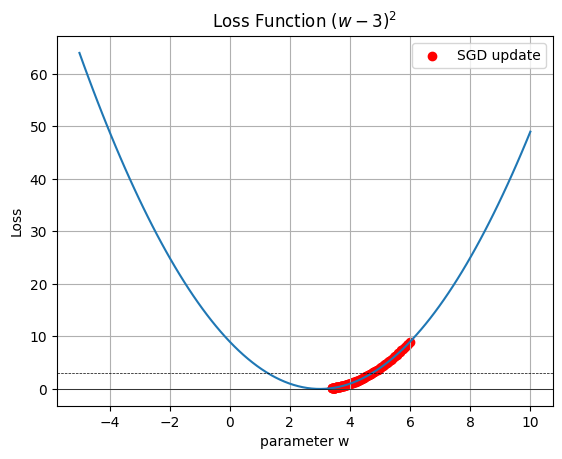

In [136]:
plt.scatter(w_history, [loss_function(w) for w in w_history], color='red', marker='o',label='SGD update')
plt.plot(w_values, loss_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(3, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('parameter w')
plt.ylabel('Loss')
plt.title('Loss Function $(w - 3)^2$')
plt.grid(True)
plt.legend()
plt.show()

에포크 추가

In [140]:
# SGD 함수 구현
def sgd(learning_rate=0.01, num_epochs=5, num_iterations_per_epoch = 10):
  # 초기화
  w = np.random.randn()
  w_history = [] # 파라미터 값을 저장할 리스트
  epoch_history = [] # 에포트별 손실을 저장할 리스트

  for i in range(num_epochs):
    epoch_w_history = []  # 현재 에포크의 파라미터 이력 저장

    for iteration in range(num_iterations_per_epoch):
      grad = gradient(w)  # 현재 파라메터에 대한 기울기 계산
      w -= learning_rate * grad  # 파라메터 업데이트
      epoch_w_history.append(w)  # 업데이트된 파라메터 저장

    w_history.extend(epoch_w_history)  # 전체 파라미터 이력 업데이트
    epoch_loss = [loss_function(w) for w in epoch_w_history]
    epoch_history.append(epoch_loss)


    print(f"epoch {i}: w = {w:.4f}, loss = {np.mean(epoch_loss):.4f}")
  return w, w_history, epoch_history
# SGD 실행
final_w, w_history, epoch_history =  sgd()

final_w, w_history, epoch_history

epoch 0: w = 1.2238, loss = 3.8094
epoch 1: w = 1.5487, loss = 2.5432
epoch 2: w = 1.8142, loss = 1.6978
epoch 3: w = 2.0311, loss = 1.1335
epoch 4: w = 2.2084, loss = 0.7567


(2.2083613005069473,
 [0.8696581074031133,
  0.9122649452550511,
  0.9540196463499501,
  0.9949392534229511,
  1.035040468354492,
  1.0743396589874021,
  1.1128528658076542,
  1.1505958084915011,
  1.187583892321671,
  1.2238322144752376,
  1.2593555701857329,
  1.2941684587820181,
  1.3282850896063778,
  1.3617193878142502,
  1.3944850000579652,
  1.426595300056806,
  1.4580633940556698,
  1.4889021261745563,
  1.519124083651065,
  1.5487416019780438,
  1.577766769938483,
  1.6062114345397134,
  1.634087205848919,
  1.6614054617319407,
  1.6881773524973018,
  1.7144138054473559,
  1.7401255293384088,
  1.7653230187516407,
  1.790016558376608,
  1.8142162272090758,
  1.8379319026648944,
  1.8611732646115964,
  1.8839497993193643,
  1.9062708033329772,
  1.9281453872663177,
  1.9495824795209913,
  1.9705908299305714,
  1.99117901333196,
  2.011355433065321,
  2.0311283244040146,
  2.0505057579159343,
  2.0694956427576154,
  2.088105729902463,
  2.106343615304414,
  2.1242167429983256,
 